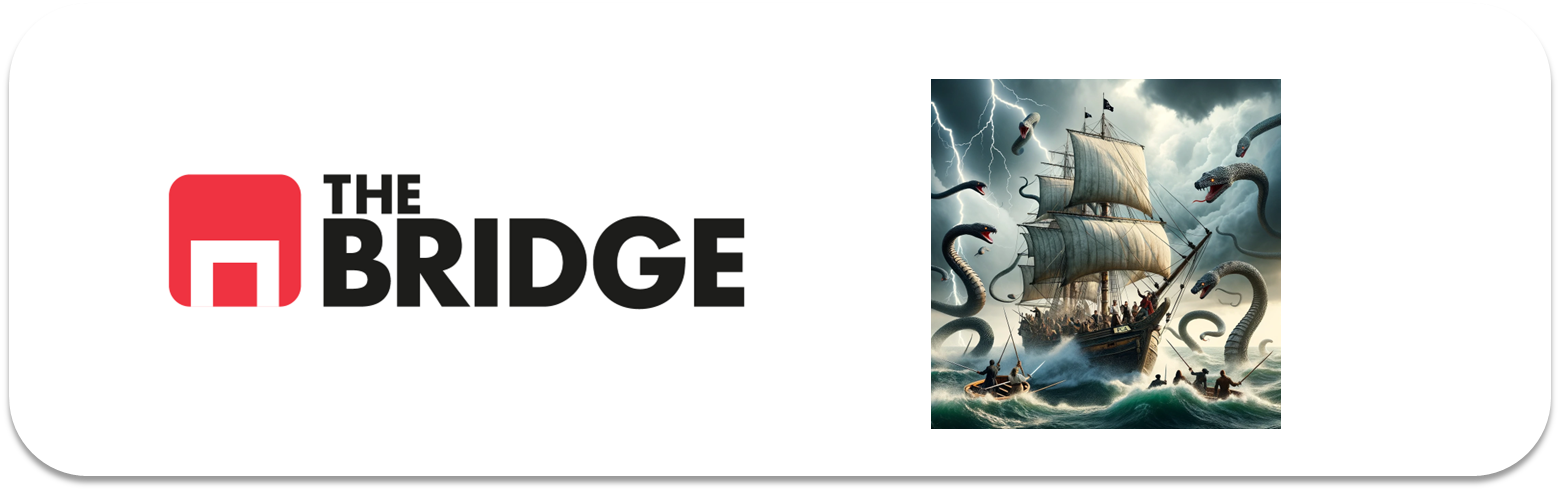

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [35]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE, SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score

In [36]:
data = pd.read_csv('./data/credit_npo.csv')
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [38]:
number_of_columns = [col for col in data.columns if "NumberOf" in col]
print(number_of_columns)

['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [39]:
# Eliminar filas con valores nulos
data = data.dropna().copy()  # Eliminar nulos y hacer una copia segura

# Convertir "NumberOf..." a categorías
number_of_columns = [col for col in data.columns if "NumberOf" in col]
for col in number_of_columns:
    data[col] = data[col].apply(lambda x: "Bajo" if x <= 2 else ("Medio" if x <= 5 else "Alto"))

In [40]:
# Convertir variables categóricas a numéricas
for col in number_of_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int32  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int32  
 7   NumberOfTimes90DaysLate               11816 non-null  int32  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int32  
 10  NumberOfDependents                    11816 non-null  int32  
dtypes: float64(3), int32

In [42]:
# Separar variables predictoras y target
X = data.drop(columns=['SeriousDlqin2yrs'])
y = data['SeriousDlqin2yrs']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [43]:
# Escalar variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

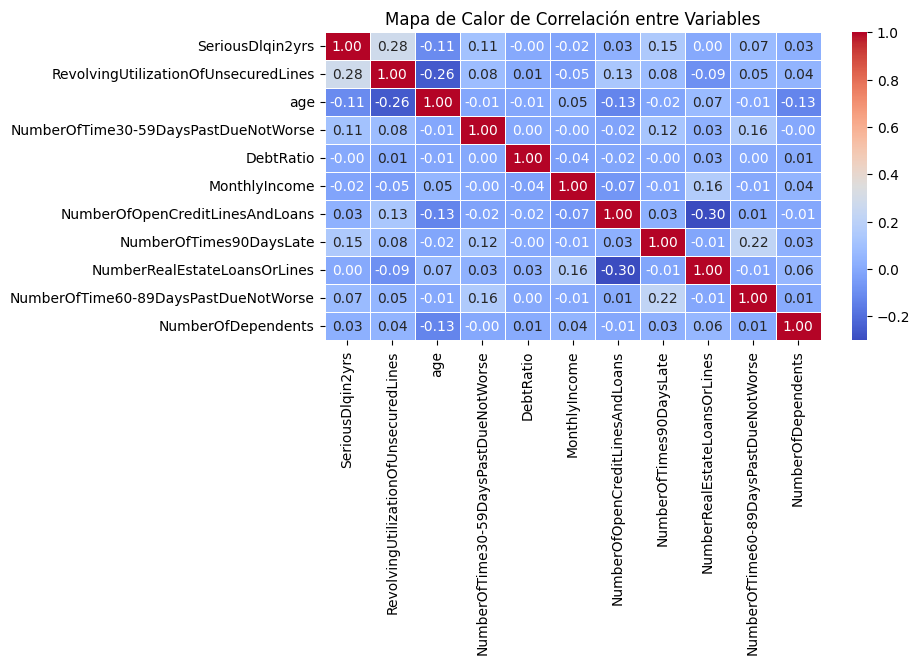

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Visualizar con un heatmap
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación entre Variables")
plt.show()


In [45]:
features_num = data.columns.to_list()



In [46]:
target = "SeriousDlqin2yrs"

In [47]:

corr= data[features_num].corr()
serie_corr = np.abs(corr[target])
serie_corr.sort_values(ascending = False)


SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.280350
NumberOfTimes90DaysLate                 0.148342
NumberOfTime30-59DaysPastDueNotWorse    0.108921
age                                     0.106076
NumberOfTime60-89DaysPastDueNotWorse    0.069581
NumberOfOpenCreditLinesAndLoans         0.028544
NumberOfDependents                      0.026156
MonthlyIncome                           0.022199
DebtRatio                               0.001666
NumberRealEstateLoansOrLines            0.001321
Name: SeriousDlqin2yrs, dtype: float64

In [48]:
r_minimo = 0.05
features_num_sel = serie_corr[serie_corr >= r_minimo].index.to_list()
features_num_sel

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [49]:
features_cat = ['age','NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',]

<Axes: >

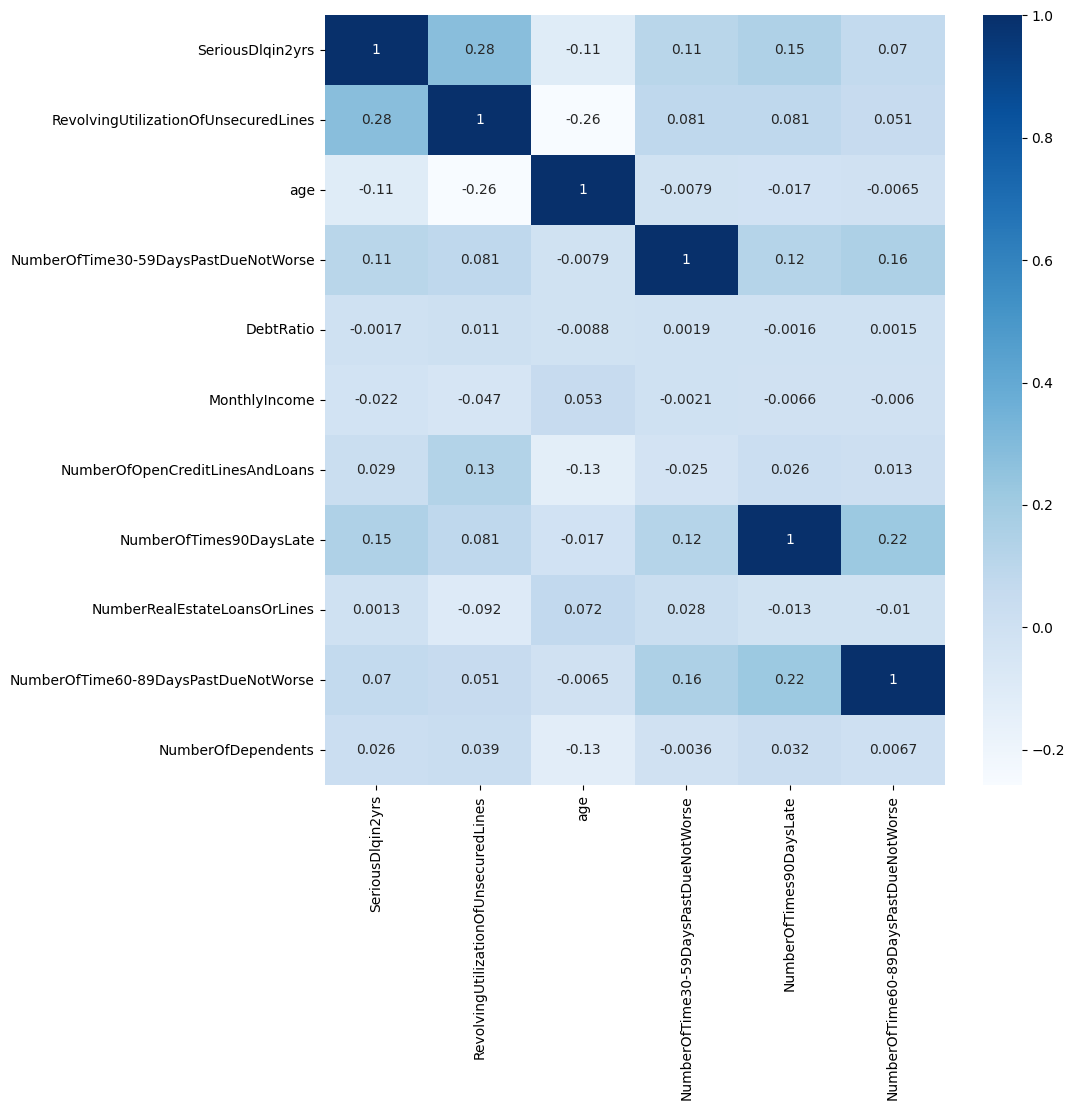

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[features_num_sel], annot= True, cmap= "Blues")

In [51]:
from sklearn.metrics import mutual_info_score
target = "SeriousDlqin2yrs"
for col in features_cat:
    print(f"MI({col};{target}):", mutual_info_score(data[col],data[target]))

MI(age;SeriousDlqin2yrs): 0.010599725150611592
MI(NumberOfTime30-59DaysPastDueNotWorse;SeriousDlqin2yrs): 0.009060856910305611
MI(NumberOfOpenCreditLinesAndLoans;SeriousDlqin2yrs): 0.0029324354069927908
MI(NumberOfTimes90DaysLate;SeriousDlqin2yrs): 0.01435521478607407
MI(NumberOfTime60-89DaysPastDueNotWorse;SeriousDlqin2yrs): 0.004570709146371768
MI(NumberOfDependents;SeriousDlqin2yrs): 0.00032693765865021295


In [ ]:
# 2️ Selección de características 
selected_features = {}

# a) Selección con SelectKBest
kbest = SelectKBest(f_classif, k=6).fit(X_train, y_train)
selected_features['SelectKBest'] = X.columns[kbest.get_support()].tolist()

In [53]:
selected_features

{'SelectKBest': ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfOpenCreditLinesAndLoans',
  'NumberOfTimes90DaysLate',
  'NumberOfTime60-89DaysPastDueNotWorse']}

In [55]:
x_data_kbest = kbest.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = kbest.get_feature_names_out())
X_train_kbest


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
0,0.039187,61.0,1.0,0.0,1.0,1.0
1,0.919317,41.0,1.0,2.0,1.0,1.0
2,0.253718,49.0,1.0,0.0,1.0,1.0
3,0.249462,26.0,1.0,2.0,1.0,1.0
4,0.224520,76.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...
9447,0.174437,61.0,1.0,0.0,1.0,1.0
9448,0.039651,64.0,1.0,0.0,1.0,1.0
9449,1.000000,29.0,1.0,1.0,1.0,1.0
9450,0.945805,51.0,2.0,0.0,1.0,1.0


In [56]:
# b) Selección con Mutual Information para categóricas
mutual_info = SelectKBest(mutual_info_classif, k=6).fit(X_train_scaled, y_train)
selected_features['Mutual Information'] = X.columns[mutual_info.get_support()].tolist()

In [58]:
# c) Selección con SelectFromModel (usando RandomForest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
selected_features['SelectFromModel'] = X.columns[rf.feature_importances_ > np.mean(rf.feature_importances_)].tolist()

In [ ]:
# d) Selección con Recursive Feature Elimination (RFE)
rfe = RFE(rf, n_features_to_select=6,step=1)
rfe.fit(X_train_scaled, y_train)
selected_features['RFE'] = X.columns[rfe.support_].tolist()

In [68]:
selected_features

{'SelectKBest': ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfOpenCreditLinesAndLoans',
  'NumberOfTimes90DaysLate',
  'NumberOfTime60-89DaysPastDueNotWorse'],
 'Mutual Information': ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfOpenCreditLinesAndLoans',
  'NumberOfTimes90DaysLate',
  'NumberOfTime60-89DaysPastDueNotWorse'],
 'SelectFromModel': ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome'],
 'RFE': ['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfTimes90DaysLate',
  'NumberRealEstateLoansOrLines'],
 'SFS': ['NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfOpenCreditLinesAndLoans',
  'NumberOfTimes90DaysLate',
  'NumberRealEstateLoansOrLines',
  'NumberOfTime60-89DaysPastDueNotWorse',
  'NumberOfDependents'],
 'Manual': ['RevolvingUtilizationOfUnsecuredLines',
  'NumberOfTime30-59DaysPastDu

In [64]:
# e) Selección con Sequential Feature Selector (SFS)
sfs = SequentialFeatureSelector(rf, n_features_to_select=6)
sfs.fit(X_train_scaled, y_train)
selected_features['SFS'] = X.columns[sfs.get_support()].tolist()

In [67]:
# f) Selección manual basada en todas las anteriores
selected_features['Manual'] = list(set(sum(selected_features.values(), [])))[:6]

In [70]:
# 3️ Comparar modelos
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [71]:
results = []
for model_name, model in models.items():
    for method, features in selected_features.items():
        X_train_selected = X_train_scaled[:, [X.columns.get_loc(f) for f in features if f in X.columns]]
        X_test_selected = X_test_scaled[:, [X.columns.get_loc(f) for f in features if f in X.columns]]
        
        scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='balanced_accuracy')
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
        test_acc = balanced_accuracy_score(y_test, y_pred)
        
        results.append({'Modelo': model_name, 'Método': method, 'CV Score': np.mean(scores), 'Test Score': test_acc})

In [73]:
# Convertir resultados en DataFrame
results_df = pd.DataFrame(results)
results_df

,Modelo,Método,CV Score,Test Score
0,RandomForest,SelectKBest,0.573259,0.585066
1,RandomForest,Mutual Information,0.573259,0.585066
2,RandomForest,SelectFromModel,0.530079,0.526253
3,RandomForest,RFE,0.557881,0.564728
4,RandomForest,SFS,0.549108,0.555182
5,RandomForest,Manual,0.530070,0.549667
6,SVM,SelectKBest,0.539162,0.552170
7,SVM,Mutual Information,0.539162,0.552170
8,SVM,SelectFromModel,0.500000,0.500000
9,SVM,RFE,0.538000,0.552170


In [74]:
best_model_info = results_df.sort_values(by='Test Score', ascending=False).iloc[0]
best_model = models[best_model_info['Modelo']]
best_features = selected_features[best_model_info['Método']]

In [ ]:
best_model_info

Modelo        RandomForest
Método         SelectKBest
CV Score          0.573259
Test Score        0.585066
Name: 0, dtype: object

In [76]:
best_features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [77]:
param_grid = {
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'XGBoost': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}
}

In [79]:
X_train_selected = X_train_scaled[:, [X.columns.get_loc(f) for f in best_features if f in X.columns]]
X_test_selected = X_test_scaled[:, [X.columns.get_loc(f) for f in best_features if f in X.columns]]

In [80]:
grid = GridSearchCV(best_model, param_grid[best_model_info['Modelo']], cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid.fit(X_train_selected, y_train)
y_pred = grid.best_estimator_.predict(X_test_selected)
final_acc = balanced_accuracy_score(y_test, y_pred)

In [81]:
print(f"Mejor modelo: {best_model_info['Modelo']} con {best_model_info['Método']}")
print(f"Mejores hiperparámetros: {grid.best_params_}")
print(f"Balanced Accuracy en Test: {final_acc:.4f}")

Mejor modelo: RandomForest con SelectKBest
Mejores hiperparámetros: {'max_depth': None, 'n_estimators': 200}
Balanced Accuracy en Test: 0.5860


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.